# MODEL BUILDING

# IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

# LOAD DATASET

In [2]:
data=pd.read_csv(r"D:\chronic\kidney_disease.csv")

In [3]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# UNDERSTANDING DATA

In [4]:
data.drop(["id"],axis=1,inplace=True)
data.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
             'blood glucose random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume',
              'white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease',
              'appetite','pedal_edema','anemia','class']

In [5]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'bacteria', 'red_blood_cells', 'pus_cell_clumps', 'diabetesmellitus', 'anemia', 'coronary_artery_disease', 'pus_cell', 'pedal_edema', 'white_blood_cell_count', 'appetite', 'class', 'hypertension', 'packed_cell_volume', 'red_blood_cell_count'}


In [7]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'blood_pressure', 'blood glucose random', 'age', 'blood_urea', 'serum_creatinine', 'specific_gravity', 'potassium', 'albumin', 'sugar', 'sodium', 'hemoglobin'}


In [8]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'bacteria', 'red_blood_cells', 'pus_cell_clumps', 'diabetesmellitus', 'anemia', 'coronary_artery_disease', 'specific_gravity', 'albumin', 'pus_cell', 'pedal_edema', 'sugar', 'appetite', 'class', 'hypertension'}


In [9]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'blood_pressure', 'blood glucose random', 'age', 'blood_urea', 'serum_creatinine', 'potassium', 'white_blood_cell_count', 'sodium', 'hemoglobin', 'packed_cell_volume', 'red_blood_cell_count'}


# Get unique values from categorical data's

In [10]:
for col in catcols:
    print(f"{col} has {data[col].unique()} values \n")

bacteria has ['notpresent' 'present' nan] values 

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

diabetesmellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

anemia has ['no' 'yes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values 

albumin has [ 1.  4.  2.  3.  0. nan  5.] values 

pus_cell has ['normal' 'abnormal' nan] values 

pedal_edema has ['no' 'yes' nan] values 

sugar has [ 0.  3.  4.  1. nan  2.  5.] values 

appetite has ['good' 'poor' nan] values 

class has ['ckd' 'ckd\t' 'notckd'] values 

hypertension has ['yes' 'no' nan] values 



In [11]:
data['class']=data['class'].replace("ckd\t","ckd")
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})

In [12]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

# To handle skewness in the data

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

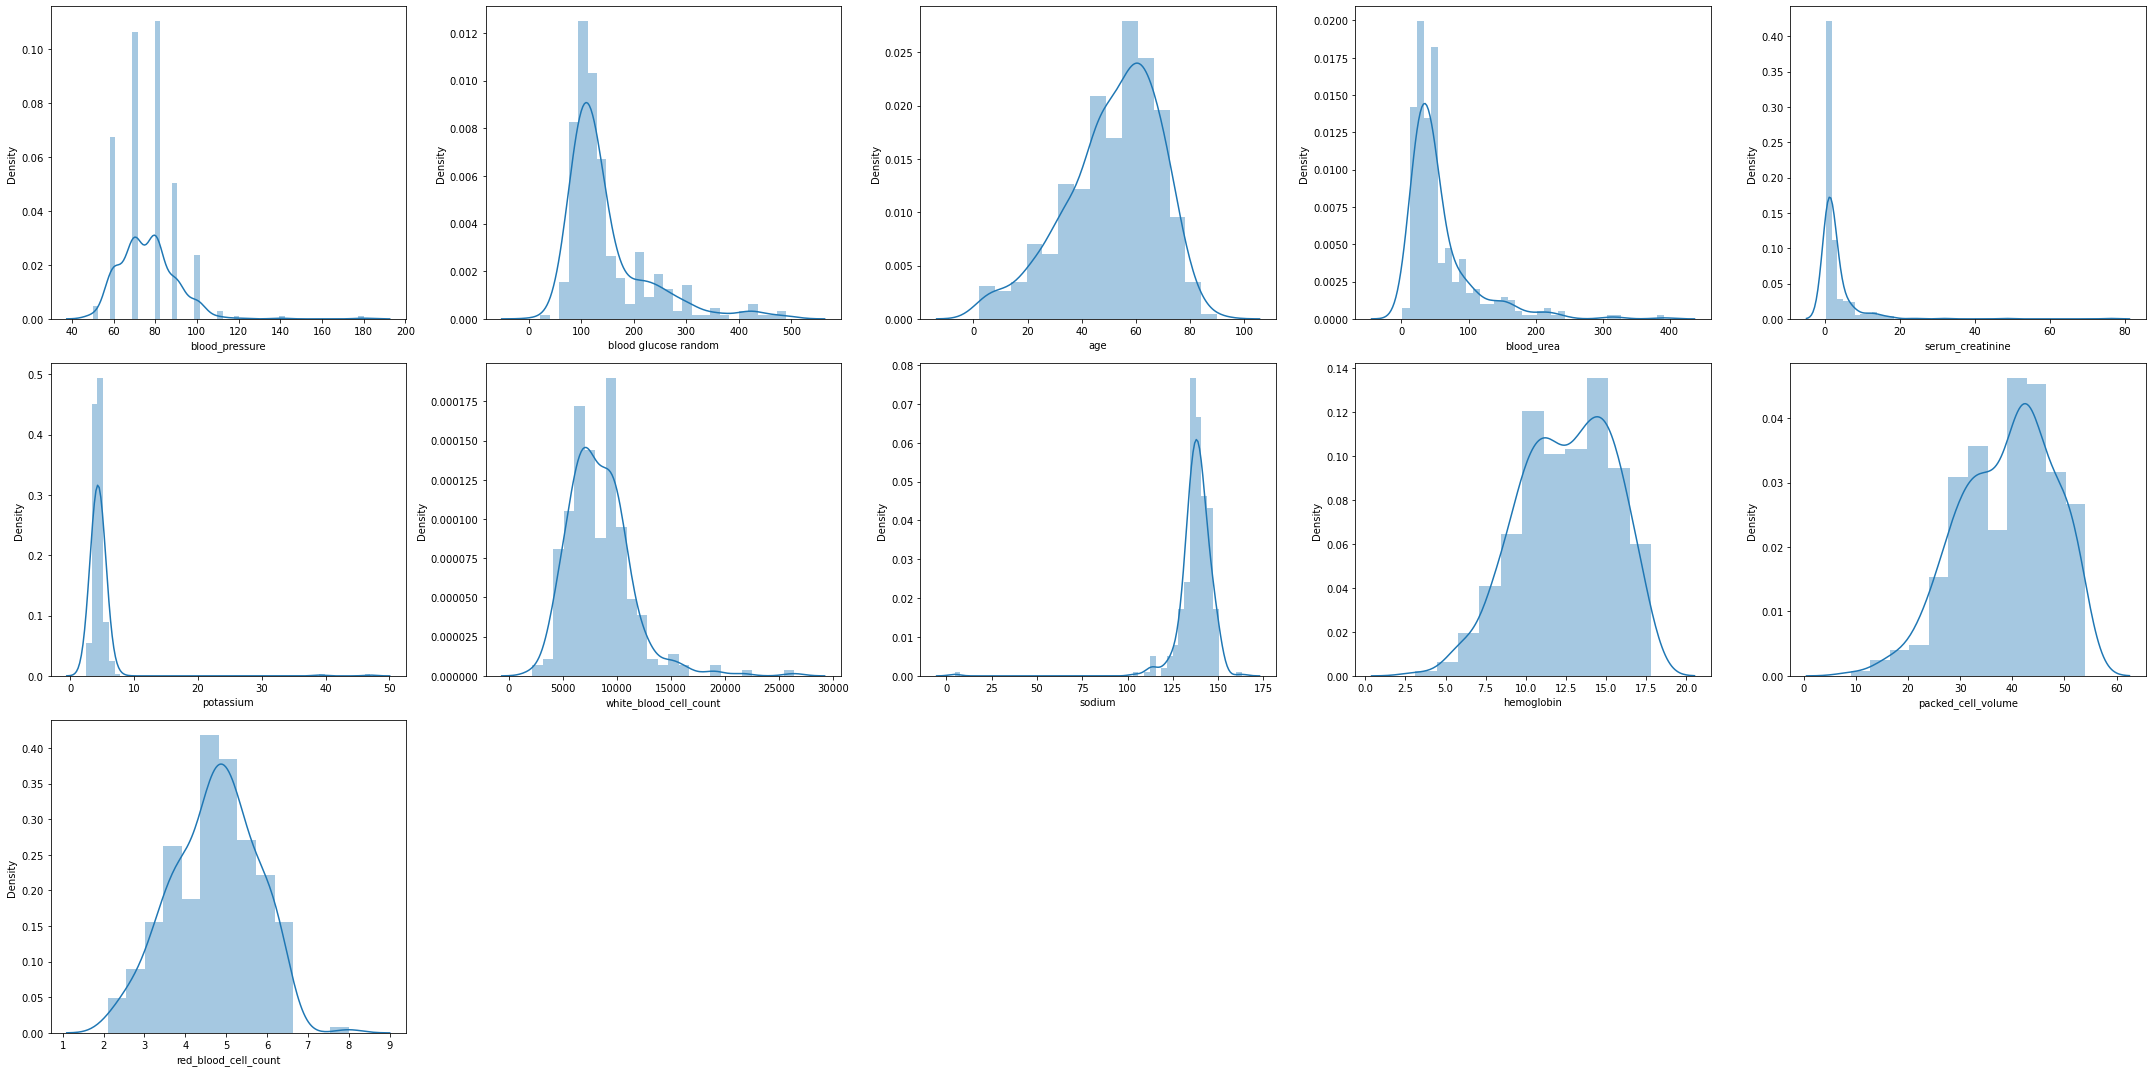

In [13]:
plt.figure(figsize = (30,15))
plotnumber =1
for column in contcols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# some data's still possess skewness because of the null values in it

In [14]:
data.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [15]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [16]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

# LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    ("LABEL ENCODING OF:",i)
    LEi=LabelEncoder()
    print(c(data[i]))
    data[i]=LEi.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
Counter({'normal': 353, 'abnormal': 47})
Counter({1: 353, 0: 47})
****************************************************************************************************
Counter({'notpresent': 358, 'present': 42})
Counter({0: 358, 1: 42})
****************************************************************************************************
Counter({'no': 263, 'yes': 137})
Counter({0: 263, 1: 137})
****************************************************************************************************
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
Counter({'no': 366, 'yes': 34})
Counter({0: 366, 1: 34})
****************************************************************************************************
Counter({1.02: 15

# DATA SPLIT INTO TRAIN SET AND TEST SET

In [18]:
selcols=['age','blood_urea','blood glucose random','coronary_artery_disease','anemia','pus_cell','red_blood_cells',
         'diabetesmellitus','pedal_edema']

x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 9)
(400, 1)


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 9)
(320, 1)
(80, 9)
(80, 1)


# MODEL BUILDING

# Using LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver ='lbfgs',max_iter=500)
print('LogisticRegression\n')
model.fit(x_train.values,y_train.values.ravel())
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print('confusion_matrix')    
print(confusion_matrix(prediction,y_test))
print('\n')
print('accuracy_score')
print(accuracy_score(prediction,y_test))
print('\n')

LogisticRegression

confusion_matrix
[[49  0]
 [ 5 26]]


accuracy_score
0.9375




C:\Users\home\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Using RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train , y_train)
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print('RandomForest\n')
print('confusion_matrix')    
print(confusion_matrix(prediction,y_test))
print('\n')
print('accuracy_score')
print(accuracy_score(prediction,y_test))
print('\n')

C:\Users\home\AppData\Local\Temp\ipykernel_15608\2865502932.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train , y_train)


RandomForest

confusion_matrix
[[52  1]
 [ 2 25]]


accuracy_score
0.9625




# Using DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print('Decision tree\n')
model.fit(x_train , y_train)
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print('confusion_matrix')   
print(confusion_matrix(prediction,y_test))
print('\n')
print('accuracy_score')
print(accuracy_score(prediction,y_test))
print('\n')

Decision tree

confusion_matrix
[[50  2]
 [ 4 24]]


accuracy_score
0.925




# SAVE THE MODEL

# Dumping Our Model in Pickle Form

In [27]:
pickle.dump(model,open('Chronic_Kidney_Disease.pk1','wb'))